# Figures 7 and S9

Script to generate Figures 7 and S9 from Section 2 *Joint Angle Monitoring* from [1]. These figures involve the machine learning model used to predict joint angles from impedance data for the prototype garment. These figures show the regression results for the joint angle reconstruction machine learning model, found here: `../../ML/JointAngles/`.

> [1] Brett C. Hannigan, Tyler J. Cuthbert, Chakaveh Ahmadizadeh, and Carlo Menon. Distributed Sensing Along Fibres for Smart Clothing. *Science Advances*. 2023 (In Review).

©2023 ETH Zurich, Brett Hannigan; D-HEST; Biomedical and Mobile Health Technology (BMHT) Lab; Carlo Menon

In [3]:
library(ggplot2)
library(cowplot)
library(magick)
library(tidyr)
library(dplyr)
library(ggh4x)

In [2]:
parent_dir <- dirname(dirname(getwd())) # Parent directory.
df <- read.csv(file.path(parent_dir, "/ML/JointAngles/results.csv")) #"~\\..\\ML\\JointAngles\\results.csv")
head(df)

,X,Time,Run,LEFT_SHOULDER,LEFT_ELBOW,LEFT_WRIST,I_0,I_1,I_2,I_3,Q_0,Q_1,Q_2,Q_3,LEFT_SHOULDER_pred,LEFT_ELBOW_pred,LEFT_WRIST_pred
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.00000000,1,19.00655,40.51166,20.42377,1372.181,2083.365,3393.959,4121.789,-1824.387,-4279.759,-7682.890,-13921.53,39.74149,31.46251,22.50915
2,1,0.04112063,1,18.95029,40.44613,20.56782,1384.076,2132.132,3442.113,4176.267,-1820.331,-4311.067,-7711.901,-13911.05,34.83828,31.10978,15.64456
3,2,0.08224125,1,18.90992,40.40792,20.66549,1395.235,2176.886,3484.404,4223.706,-1815.722,-4338.403,-7737.298,-13901.26,30.72122,31.24076,13.32141
4,3,0.12336188,1,18.88554,40.39605,20.71705,1405.683,2217.790,3521.089,4264.423,-1810.589,-4361.947,-7759.246,-13892.14,27.26333,31.68967,14.09919
5,4,0.16448251,1,18.87767,40.40790,20.72292,1415.446,2255.001,3552.423,4298.730,-1804.959,-4381.872,-7777.906,-13883.66,24.20720,32.08616,14.78631
6,5,0.20560314,1,18.88717,40.43876,20.68496,1424.548,2288.676,3578.653,4326.934,-1798.859,-4398.351,-7793.436,-13875.81,21.53485,32.43256,15.38681


In [4]:
df[1165:4120,]$Time <- df[1165:4120,]$Time - (df[1165,]$Time - df[1164,]$Time) + 0.041120627 # Correction for omitted data from Run 1.

In [5]:
df_long <- df %>% 
        pivot_longer(c("LEFT_SHOULDER", "LEFT_ELBOW", "LEFT_WRIST"), values_to="angle_actual", names_to='joint', names_pattern="^LEFT_([^_]+)(?:_pred)?$")
df_angle_pred <- df %>%
        pivot_longer(c("LEFT_SHOULDER_pred", "LEFT_ELBOW_pred", "LEFT_WRIST_pred"), values_to="angle_pred", names_to='joint', names_pattern="^LEFT_([^_]+)(?:_pred)?$")
df_long$angle_pred <- df_angle_pred$angle_pred
df_long <- select(df_long, -c("LEFT_SHOULDER_pred", "LEFT_ELBOW_pred", "LEFT_WRIST_pred"))
df_long$joint[df_long$joint=="SHOULDER"] <- "0SHOULDER"
df_long$joint[df_long$joint=="ELBOW"] <- "1ELBOW"
df_long$joint[df_long$joint=="WRIST"] <- "2WRIST"
df_long$joint <- factor(df_long$joint, levels=c("0SHOULDER", "1ELBOW", "2WRIST"))
head(df_long)

X,Time,Run,I_0,I_1,I_2,I_3,Q_0,Q_1,Q_2,Q_3,joint,angle_actual,angle_pred
<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
0,0.00000000,1,1372.181,2083.365,3393.959,4121.789,-1824.387,-4279.759,-7682.890,-13921.53,0SHOULDER,19.00655,39.74149
0,0.00000000,1,1372.181,2083.365,3393.959,4121.789,-1824.387,-4279.759,-7682.890,-13921.53,1ELBOW,40.51166,31.46251
0,0.00000000,1,1372.181,2083.365,3393.959,4121.789,-1824.387,-4279.759,-7682.890,-13921.53,2WRIST,20.42377,22.50915
1,0.04112063,1,1384.076,2132.132,3442.113,4176.267,-1820.331,-4311.067,-7711.901,-13911.05,0SHOULDER,18.95029,34.83828
1,0.04112063,1,1384.076,2132.132,3442.113,4176.267,-1820.331,-4311.067,-7711.901,-13911.05,1ELBOW,40.44613,31.10978
1,0.04112063,1,1384.076,2132.132,3442.113,4176.267,-1820.331,-4311.067,-7711.901,-13911.05,2WRIST,20.56782,15.64456


## Import Image for Example Movements
This will be the rightmost column of Figure 7.

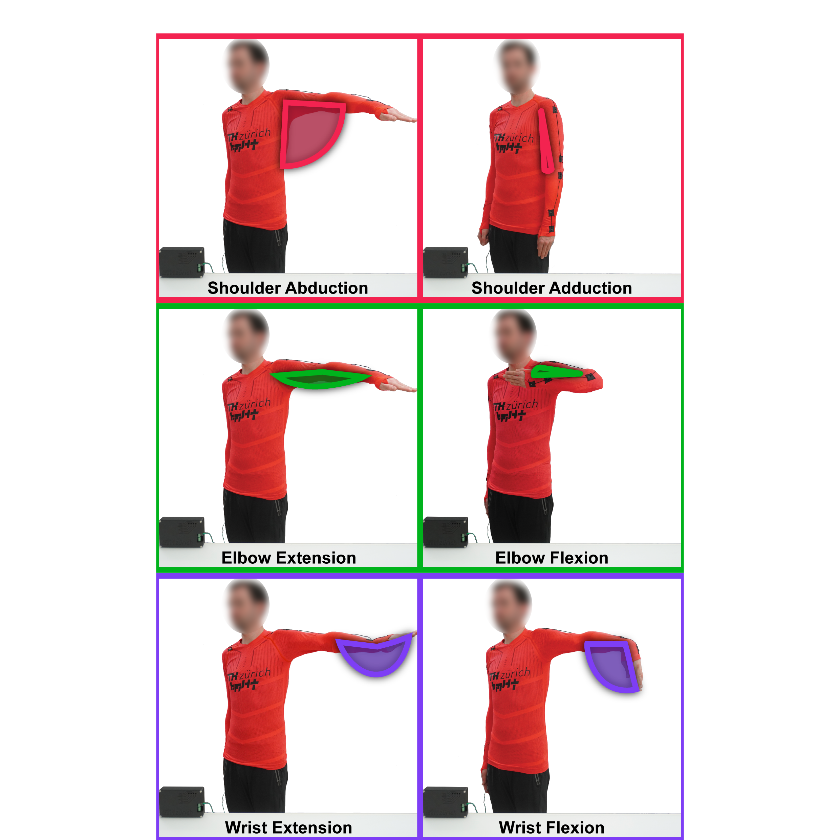

In [7]:
joint_angle_image <- ggdraw() + draw_image(".\\Joint Angles.png", scale=1)
print(joint_angle_image)

## Generate Time Series Plots for Shoulder, Elbow, Wrist Angles

These traces will be the centre column of Figure 7.

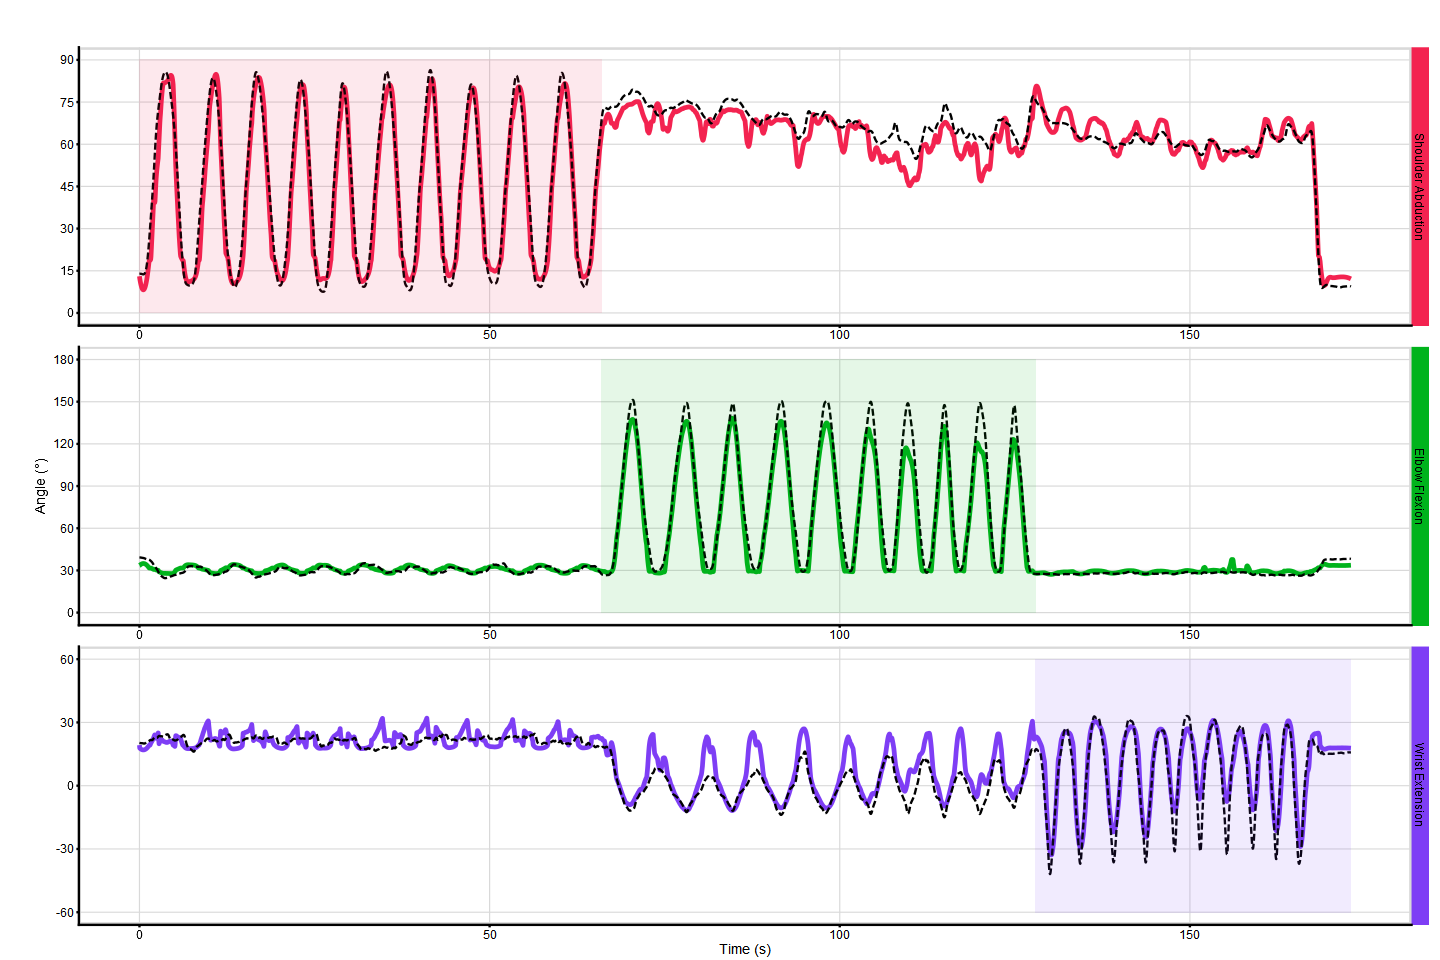

In [8]:
colour_list = c('#F32350', '#00B31C', '#7E3EF5', '#E62DFF')
strip <- strip_themed(background_y = elem_list_rect(fill = colour_list))
joint_labeller <- as_labeller(c(
  '0SHOULDER'="Shoulder Abduction",
  '1ELBOW'="Elbow Flexion",
  '2WRIST'="Wrist Extension"
))
df_rect <- data.frame(xmin=c(0, 66, 128), 
                      xmax=c(66, 128, 173), 
                      ymin=c(0, 0, -60), 
                      ymax=c(90, 180, 60), 
                      joint=c('0SHOULDER', '1ELBOW', '2WRIST')
                      )

options(repr.plot.width=12, repr.plot.height=8)
plt1 <- ggplot(data=subset(df_long, Run==10), aes(x=Time, y=angle_pred, colour=joint, group=joint))
plt1 <- plt1 + scale_colour_manual(values=colour_list, guide="none")
plt1 <- plt1 + scale_fill_manual(values=colour_list, guide="none")
plt1 <- plt1 + geom_line(linewidth=1)
plt1 <- plt1 + geom_line(aes(y=angle_actual), linewidth=0.5, linetype='longdash', colour='black')
plt1 <- plt1 + geom_rect(data=df_rect, mapping=aes(NULL, NULL, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=joint), linetype=0, alpha=0.1)
#plt1 <- plt1 + scale_y_continuous(breaks=seq(from=0, to=90, by=15))
plt1 <- plt1 + ylab(expression("Angle (\u00B0)"))
plt1 <- plt1 + xlab(expression("Time (s)"))
plt1 <- plt1 + theme_cowplot(6) + theme(plot.margin = unit(c(1, 0.25, 0, 0.75), "cm"))
plt1 <- plt1 + panel_border() + background_grid(major="xy", size.major=0.25)
plt1 <- plt1 + facet_grid2(vars(joint), strip=strip, labeller=joint_labeller, axes="all", scales="free_y")
plt1 <- plt1 + facetted_pos_scales(
  y = list(
    joint=="0SHOULDER" ~ scale_y_continuous(breaks=seq(from=0, to=90, by=15), lim=c(0, 90)),
    joint=="1ELBOW" ~ scale_y_continuous(breaks=seq(from=0, to=180, by=30), lim=c(0, 180)),
    joint=="2WRIST" ~ scale_y_continuous(breaks=seq(from=-60, to=60, by=30), lim=c(-60, 60))
  )
)
#plt1 <- plt1 + ggtitle('Right Shoulder')
plt1 <- plt1 + theme(text=element_text(size=8), axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7))
print(plt1)

## Produce Scatterplots for Shoulder, Elbow, Wrist Angles

These scatterplots will show the R-squared values and be the rightmost column of Figure 7.

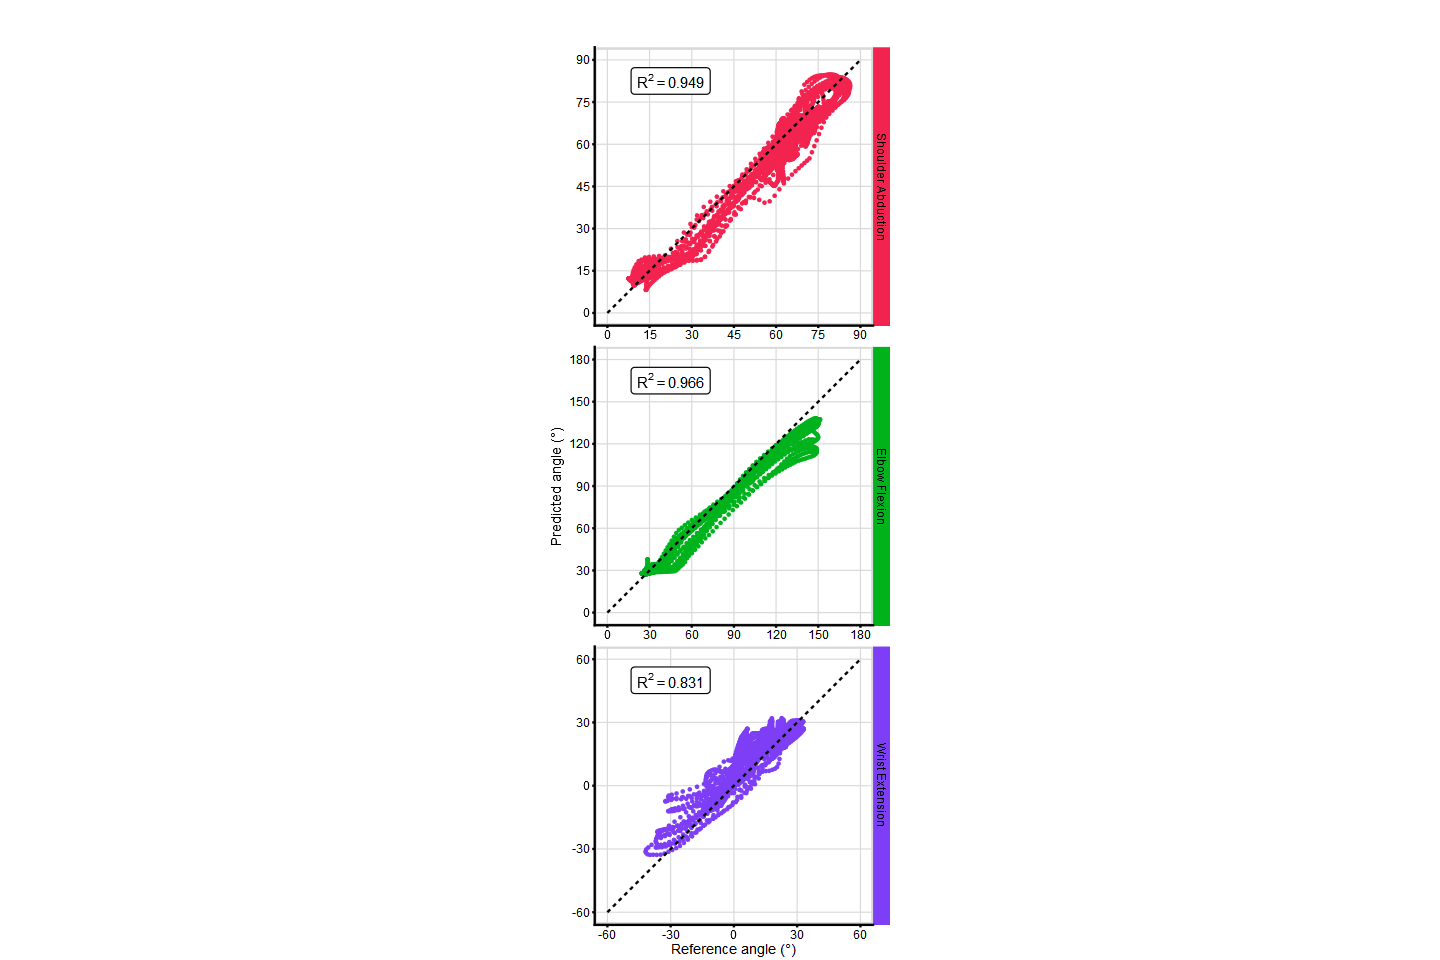

In [11]:
df_line <- data.frame(x=c(0, 0, -60), 
                      y=c(0, 0, -60), 
                      xend=c(90, 180, 60), 
                      yend=c(90, 180, 60), 
                      joint=c('0SHOULDER', '1ELBOW', '2WRIST')
                      )

options(repr.plot.width=12, repr.plot.height=8)
r2_values <- c(0.94912163373811, 0.96637054420246, 0.831081088847418) # from Excel sheet
r2_label_shoulder <- paste("R^2 == ", sprintf("'%.3f'", r2_values[1]))
r2_label_elbow <- paste("R^2 == ", sprintf("'%.3f'", r2_values[2]))
r2_label_wrist <- paste("R^2 == ", sprintf("'%.3f'", r2_values[3]))
r2_dict <- data.frame(joint=c('0SHOULDER', '1ELBOW', '2WRIST'), r2=c(r2_label_shoulder, r2_label_elbow, r2_label_wrist), x=c(22.5, 45, -30), y=c(82.5, 165, 50))

plt4 <- ggplot(data=subset(df_long, Run==10), aes(x=angle_actual, y=angle_pred, group=joint, colour=joint))
plt4 <- plt4 + geom_point(size=0.25) # F42A56
plt4 <- plt4 + scale_colour_manual(values=colour_list, guide="none")
plt4 <- plt4 + geom_segment(data=df_line, aes(x=x, y=y, xend=xend, yend=yend), linewidth=0.5, linetype='dashed', colour='black')
#plt4 <- plt4 + annotate("text", x=22.5, y=67.5, colour="black", size=3, label=r2_label_shoulder, parse=TRUE)
plt4 <- plt4 + geom_label(data=r2_dict, aes(label=r2, group=joint, x=x, y=y), size=3, colour='black', parse=TRUE)
#plt4 <- plt4 + geom_line(aes(y=LEFT_SHOULDER), size=0.5, linetype='longdash', colour='black')
#plt4 <- plt4 + scale_y_continuous(breaks=seq(from=0, to=90, by=15))
#plt4 <- plt4 + scale_x_continuous(breaks=seq(from=0, to=90, by=15))
plt4 <- plt4 + ylab(expression("Predicted angle (\u00B0)"))
plt4 <- plt4 + xlab(expression("Reference angle (\u00B0)"))
plt4 <- plt4 + theme_cowplot(6) + theme(plot.margin = unit(c(1, 0, 0, 0), "cm"))
plt4 <- plt4 + panel_border() + background_grid(major="xy", size.major=0.25)
plt4 <- plt4 + facet_grid2(vars(joint), strip=strip, labeller=joint_labeller, axes="all", independent="all", scales="free")
plt4 <- plt4 + facetted_pos_scales(
  y = list(
    joint=="0SHOULDER" ~ scale_y_continuous(breaks=seq(from=0, to=90, by=15), lim=c(0, 90)),
    joint=="1ELBOW" ~ scale_y_continuous(breaks=seq(from=0, to=180, by=30), lim=c(0, 180)),
    joint=="2WRIST" ~ scale_y_continuous(breaks=seq(from=-60, to=60, by=30), lim=c(-60, 60))
  ),
  x = list(
    joint=="0SHOULDER" ~ scale_x_continuous(breaks=seq(from=0, to=90, by=15), lim=c(0, 90)),
    joint=="1ELBOW" ~ scale_x_continuous(breaks=seq(from=0, to=180, by=30), lim=c(0, 180)),
    joint=="2WRIST" ~ scale_x_continuous(breaks=seq(from=-60, to=60, by=30), lim=c(-60, 60))
  )
)
#plt4 <- plt4 + ggtitle('Right Shoulder')
plt4 <- plt4 + theme(text=element_text(size=8), axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7), aspect.ratio=1)
print(plt4)

## Compile Figure 7

Combine the plots and save as PNG, EPS.

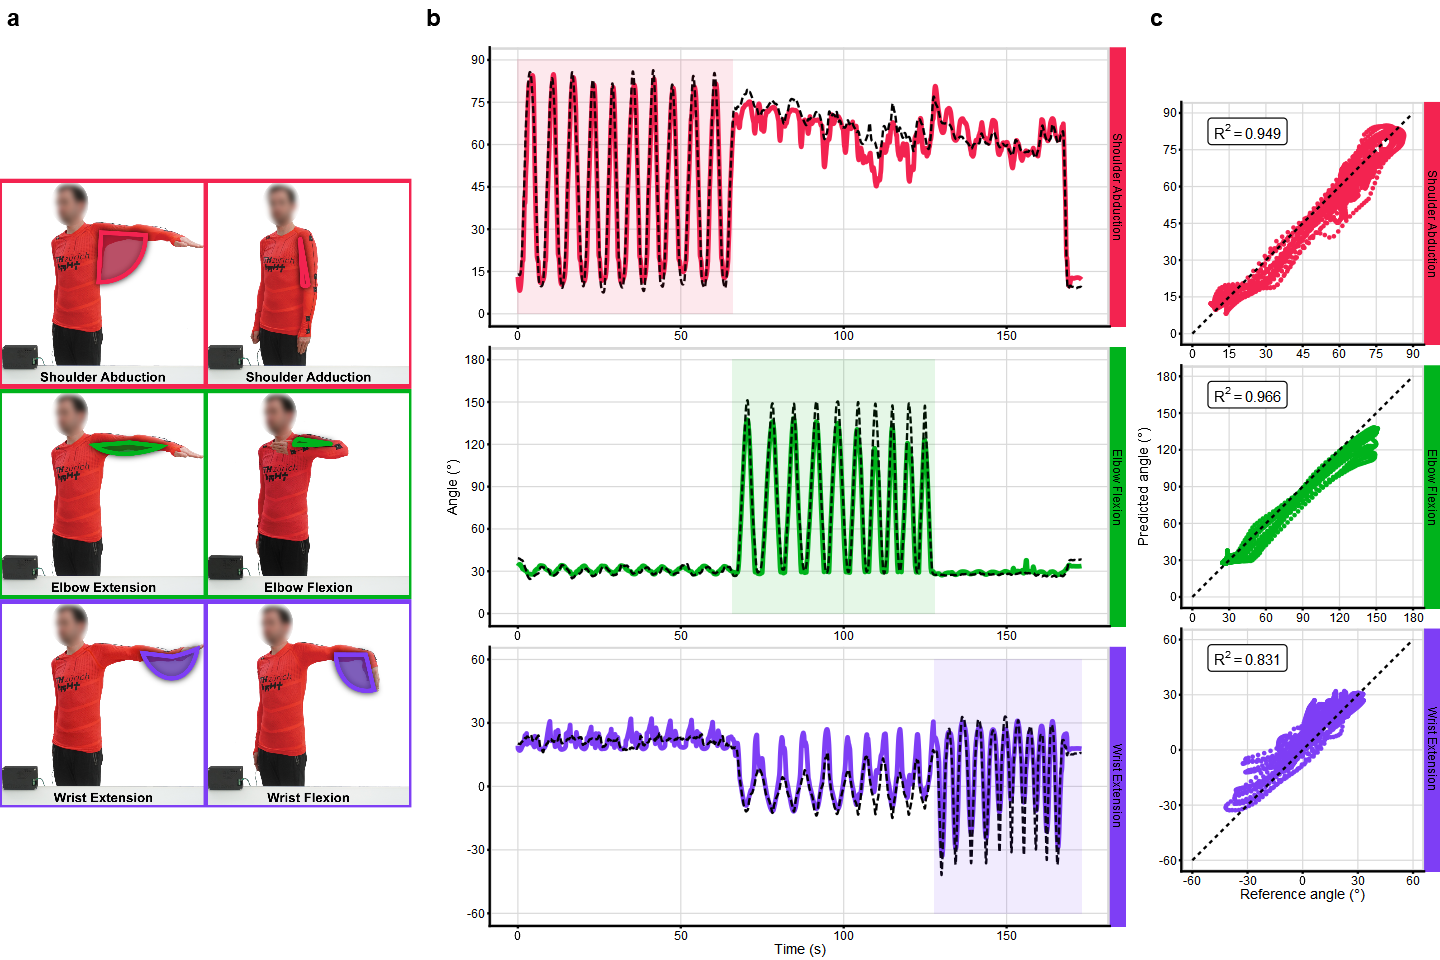

In [13]:
all_plots <- plot_grid(plt1, plt4, labels=c("b", "c"), rel_widths=c(3, 1.25), hjust=-1, ncol=2)
plot_grid(joint_angle_image, all_plots, labels=c("a"), nrow=1, rel_widths=c(1, 2.5))
ggsave("Fig7.png", width=180, height=90, units="mm", dpi=600, scale=1.5, bg="white")
ggsave("Fig7.eps", width=180, height=90, units="mm", scale=1.5, bg="white", device=cairo_ps, fallback_resolution=600)

## Produce Figure S9

This is the composite extended data figure showing all the folds, to be included in the Supplementary Materials.

In [18]:
reference_angles <- gather(df[1:6], "Joint", "Reference.Angle", 4:6)

d2 <- df[c(1:3, 15:17)]
d2 <- d2 %>% rename_at(vars(c("LEFT_SHOULDER_pred", "LEFT_ELBOW_pred", "LEFT_WRIST_pred")), ~ c("LEFT_SHOULDER", "LEFT_ELBOW", "LEFT_WRIST"))
predicted_angles <- gather(d2, "Joint", "Predicted.Angle", 4:6)

all_angles <- merge(reference_angles, predicted_angles, by=c("Time", "Run", "Joint"))
all_angles$X.x <- NULL
all_angles$X.y <- NULL
head(all_angles)

,Time,Run,Joint,Reference.Angle,Predicted.Angle
,<dbl>,<int>,<chr>,<dbl>,<dbl>
1,0,1,LEFT_ELBOW,40.51166,31.46251
2,0,1,LEFT_SHOULDER,19.00655,39.74149
3,0,1,LEFT_WRIST,20.42377,22.50915
4,0,10,LEFT_ELBOW,39.23954,33.55215
5,0,10,LEFT_SHOULDER,13.91337,13.05401
6,0,10,LEFT_WRIST,20.29609,19.24407


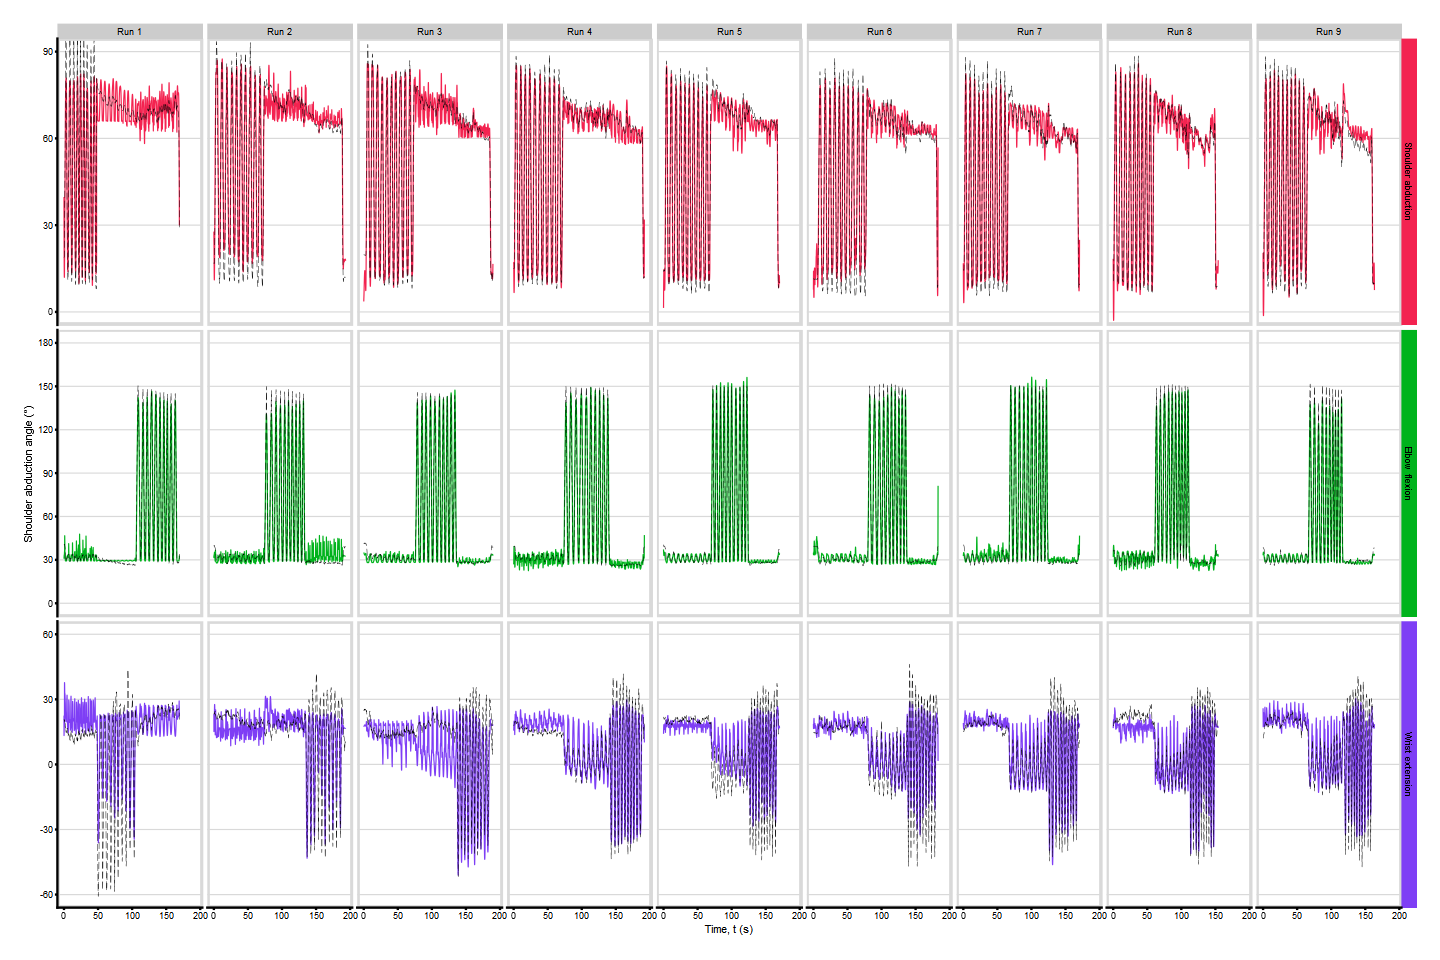

In [19]:
options(repr.plot.width=12, repr.plot.height=8)
strip <- strip_themed(background_y = elem_list_rect(fill = c('#F32350', '#00B31C', '#7E3EF5')))
joint_labels <- as_labeller(c("LEFT_SHOULDER" = "Shoulder abduction", "LEFT_ELBOW" = "Elbow flexion", "LEFT_WRIST" = "Wrist extension",
                              `1` = "Run 1", `2` = "Run 2", `3` = "Run 3", `4` = "Run 4", `5` = "Run 5", `6` = "Run 6", `7` = "Run 7", `8` = "Run 8", `9` = "Run 9"))
joint_scales <- list(
  scale_y_continuous(breaks=seq(from=0, to=90, by=30), limits=c(0, 90)),
  scale_y_continuous(breaks=seq(from=0, to=180, by=30), limits=c(0, 180)),
  scale_y_continuous(breaks=seq(from=-60, to=60, by=30), limits=c(-60, 60))
)
all_angles$Joint <- factor(all_angles$Joint, levels=c("LEFT_SHOULDER", "LEFT_ELBOW", "LEFT_WRIST"))
plt7 <- ggplot(data=subset(all_angles, Run!=10), aes(x=Time, y=Predicted.Angle, group=interaction(Run, Joint), colour=Joint))
plt7 <- plt7 + geom_line(linewidth=0.25) # F42A56
plt7 <- plt7 + geom_line(aes(y=Reference.Angle), size=0.1, linetype='longdash', colour='black')
plt7 <- plt7 + scale_colour_manual(values=c("LEFT_SHOULDER" = "#F32350", "LEFT_ELBOW" = "#00B31C", "LEFT_WRIST" = "#7E3EF5")) + guides(color="none")
plt7 <- plt7 + scale_y_continuous(breaks=seq(from=-180, to=180, by=30))
plt7 <- plt7 + ylab(expression("Shoulder abduction angle"*' (\u00B0)'))
plt7 <- plt7 + xlab(expression('Time, t'*' (s)'))
plt7 <- plt7 + theme_cowplot(6) + theme(plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm"))
plt7 <- plt7 + panel_border() + background_grid(major="y", size.major=0.25)
plt7 <- plt7 + facet_grid2(vars(Joint), vars(Run), strip=strip, labeller=joint_labels, scales="free_y") + facetted_pos_scales(y = joint_scales)
#plt1 <- plt1 + annotate("rect", xmin=0, xmax=66, ymin=0, ymax=90, fill="#F32350", alpha=0.1)
#plt1 <- plt1 + ggtitle('Right Shoulder')
plt1 <- plt1 + theme(, text=element_text(size=8), axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7))
print(plt7)
ggsave("FigS9.png", width=240, height=120, units="mm", dpi=600, scale=1, bg="white")
ggsave("FigS9.eps", width=240, height=120, units="mm", scale=1, bg="white", device=cairo_ps, fallback_resolution=600)